# Librerias

In [1]:
import sklearn.mixture
import sklearn.feature_extraction.text
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from scipy.stats import shapiro
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import normaltest
import sklearn
from matplotlib.colors import Normalize
import tqdm

In [2]:
#plt.ioff()
curr_path=os.getcwd()
base_list=curr_path.split(os.sep)[:-1];
base_path_list=[elem+os.sep for elem in base_list]
base_path=''.join(base_path_list)

phenotypic_path=Path(base_path+'csv-fenotipico')
characterization_path=Path(base_path+'Caracterizaciones')

## Abriendo csv's

In [3]:
phen_csv=pd.read_csv(phenotypic_path/'Table_new_cols.csv')
null_phen_csv=phen_csv[pd.isnull(phen_csv['DSM_IV_TR'])]
subjects_DSM_null=pd.unique(null_phen_csv['SUB_ID'])

#subjects_phen_csv=phen_csv['SUB_ID'].values
phen_csv.head()

,SUB_ID,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,HANDEDNESS_CATEGORY,DSM_IV_TR
0,29006,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,48.0,1.0,NaN
1,29007,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,41.0,1.0,NaN
2,29008,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,59.0,1.0,NaN
3,29009,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,57.0,1.0,NaN
4,29010,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,45.0,1.0,NaN


In [4]:
char_csv=pd.read_csv(characterization_path/'10-sep-2021'/'combined-dif-spatial'/'curvelet_abide_adults_sample_male_axial.csv')
bad_log_csv=pd.read_csv(characterization_path/'10-sep-2021'/'combined-dif-spatial'/'curvelet_abide_adults_sample_male_axial-bad-log.csv', na_filter= False)
discard_q_csv=pd.read_csv('discard-q.csv')

In [5]:
display(discard_q_csv)

,ID
0,50133
1,50136
2,50185
3,50192
4,50197
5,50272
6,50273
7,50274
8,50276
9,50277


In [6]:
char_csv.head()

,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,curv_234,curv_235,curv_236,curv_237,curv_238,curv_239,curv_240,curv_241,curv_242,curv_243
0,1.0,left amygdala,29007.0,1.0,ABIDE-II,BNI_1,41.0,0.092684,0.751493,0.091313,...,0.002649,0.001477,0.417342,-6.146305e-19,0.002814,0.488632,-0.000475,0.003167,0.508253,-2.120066e-10
1,2.0,right amygdala,29007.0,1.0,ABIDE-II,BNI_1,41.0,1.475468,0.977703,1.100462,...,0.008476,0.055584,0.901106,5.773145e-19,0.046615,0.881068,0.001264,0.034842,0.855190,-2.007423e-07
2,3.0,"left cingulate gyrus, anterior division",29007.0,1.0,ABIDE-II,BNI_1,41.0,0.000090,0.195604,1.267287,...,-0.000802,0.001928,0.421084,-2.545133e-19,0.001417,0.415323,-0.000295,0.001279,0.428391,3.357393e-09
3,3.0,"left cingulate gyrus, anterior division",29007.0,1.0,ABIDE-II,BNI_1,41.0,0.000090,0.195604,1.267287,...,-0.000802,0.001928,0.421084,-2.545133e-19,0.001417,0.415323,-0.000295,0.001279,0.428391,3.357393e-09
4,3.0,"left cingulate gyrus, anterior division",29007.0,1.0,ABIDE-II,BNI_1,41.0,0.000090,0.195604,1.267287,...,-0.000802,0.001928,0.421084,-2.545133e-19,0.001417,0.415323,-0.000295,0.001279,0.428391,3.357393e-09


In [7]:
char_csv.query("region_index==8.0").drop_duplicates("subject_id")

,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,curv_234,curv_235,curv_236,curv_237,curv_238,curv_239,curv_240,curv_241,curv_242,curv_243
11,8.0,Left frontal pole,29007.0,1.0,ABIDE-II,BNI_1,41.0000,0.034430,0.374835,1.354199,...,5.170120e-04,0.000314,0.347394,5.051117e-20,0.000235,0.342987,0.000157,0.000147,0.329415,-4.777214e-12
35,8.0,Left frontal pole,29028.0,1.0,ABIDE-II,BNI_1,21.0000,0.088819,0.420019,1.569552,...,4.149888e-19,0.000894,0.387319,1.290377e-19,0.000640,0.379555,0.000066,0.000530,0.377635,-1.089647e-11
59,8.0,Left frontal pole,29029.0,1.0,ABIDE-II,BNI_1,20.0000,0.083083,0.415474,1.577207,...,-1.057087e-18,0.000810,0.376902,-1.951779e-19,0.000714,0.381884,0.000037,0.000490,0.371504,1.169110e-12
83,8.0,Left frontal pole,29031.0,1.0,ABIDE-II,BNI_1,21.0000,0.052740,0.395255,1.430324,...,1.855590e-19,0.000458,0.362597,1.253411e-19,0.000329,0.357960,0.000304,0.000270,0.356634,4.358378e-10
107,8.0,Left frontal pole,29037.0,1.0,ABIDE-II,BNI_1,19.0000,0.039804,0.386814,1.184353,...,9.673930e-04,0.000468,0.362707,-6.300183e-21,0.000393,0.363811,0.000128,0.000282,0.354293,-6.602666e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10643,8.0,Left frontal pole,50508.0,1.0,ABIDE-I,USM,26.3792,0.052173,0.390212,1.522377,...,-1.781947e-19,0.000673,0.371398,1.005955e-19,0.000672,0.381999,0.000385,0.000616,0.387653,3.197431e-09
10667,8.0,Left frontal pole,50514.0,1.0,ABIDE-I,USM,21.4018,0.000011,0.170292,1.654560,...,6.369394e-19,0.001084,0.389452,-1.447939e-20,0.001102,0.402077,0.000030,0.000805,0.394262,-1.938121e-11
10691,8.0,Left frontal pole,50525.0,1.0,ABIDE-I,USM,32.8487,0.085997,0.416760,1.532908,...,-1.999994e-19,0.000916,0.387401,-1.277671e-19,0.000826,0.392228,0.000123,0.000576,0.380987,-1.429191e-09
10715,8.0,Left frontal pole,50529.0,1.0,ABIDE-I,USM,42.3354,0.060589,0.396590,1.608293,...,1.465292e-03,0.000713,0.374831,-2.026202e-19,0.000784,0.391971,0.000691,0.000496,0.373960,8.288915e-12


In [8]:
display(char_csv.query('region_name=="Amygdala_L"'))

,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,curv_234,curv_235,curv_236,curv_237,curv_238,curv_239,curv_240,curv_241,curv_242,curv_243


In [9]:
def filter_bad_1(bad_str):
    s = bad_str.split('characterization issue on region')
    if len(s)>1:
        return int(s[1])
    else:
        return 54

In [10]:
bad_log_csv['region_issue'] = [filter_bad_1(stri) for stri in bad_log_csv['bad_log_cell1'].values]

In [11]:
display(bad_log_csv)

,bad_log_cell1,bad_log_cell2,bad_log_cell3,bad_log_cell4,region_issue
0,characterization issue on region 10,29057,ETH_1,ABIDE-II,10
1,characterization issue on region 10,29057,ETH_1,ABIDE-II,10
2,characterization issue on region 5,29062,ETH_1,ABIDE-II,5
3,characterization issue on region 5,29086,ETH_1,ABIDE-II,5
4,characterization issue on region 10,29657,KUL_3,ABIDE-II,10
5,characterization issue on region 10,29657,KUL_3,ABIDE-II,10
6,characterization issue on region 10,51459,Caltech,ABIDE-I,10
7,characterization issue on region 10,51459,Caltech,ABIDE-I,10
8,characterization issue on region 11,51476,Caltech,ABIDE-I,11
9,characterization issue on region 11,51476,Caltech,ABIDE-I,11


In [12]:
int_regions = [45,46,4,6,20,37, 153, 155,3, 5, 19,15,38, 154, 156,68,21,23,22,24,65,69,85,60]
bad_log_final = bad_log_csv[bad_log_csv['region_issue'].isin(int_regions)]
display(bad_log_final.head())

,bad_log_cell1,bad_log_cell2,bad_log_cell3,bad_log_cell4,region_issue
2,characterization issue on region 5,29062,ETH_1,ABIDE-II,5
3,characterization issue on region 5,29086,ETH_1,ABIDE-II,5
11,characterization issue on region 5,51318,MaxMun,ABIDE-I,5
12,characterization issue on region 5,51323,MaxMun,ABIDE-I,5
13,characterization issue on region 5,51338,MaxMun,ABIDE-I,5


In [13]:
char_csv=char_csv.dropna()
discarded_subjects=bad_log_final['bad_log_cell2'].values.tolist()+discard_q_csv['ID'].values.tolist()
print(discarded_subjects)

for subject in discarded_subjects:
    char_csv=char_csv.query('subject_id!=@subject')

#char_csv=char_csv[~char_csv.subject_id.isin(subjects_DSM_null)]
    
regions=pd.unique(char_csv['region_name'])
region_idx=pd.unique(char_csv['region_index'])


regions_dataframe=pd.DataFrame(data={'index':region_idx, 'region':regions}).set_index('index')
pd.options.display.max_rows=200
display(regions_dataframe)

#region_list=['Amygdala_L', 'Amygdala_R', 'Frontal_Sup_2_R', 'Frontal_Mid_2_R', 'Frontal_Sup_Medial_R',
#            'Cingulate_Mid_L', 'ACC_pre_L', 'ACC_sup_L', 'Frontal_Sup_2_L', 'Frontal_Mid_2_L', 'Frontal_Sup_Medial_L',
#            'Supp_Motor_Area_L', 'Cingulate_Mid_R', 'ACC_pre_R', 'ACC_sup_R', 'SupraMarginal_R', 'Frontal_Med_Orb_L', 
#             'Rectus_L', 'Frontal_Med_Orb_R', 'Rectus_R', 'Parietal_Inf_L', 'Angular_L', 'Temporal_Sup_L', 'Fusiform_R']

#region_list=['Right Amygdala', 'Left Frontal Pole', 'Right Frontal Pole', 
           #  'Left Frontal Medial Cortex', 'Right Frontal Medial Cortex', 'Left Cingulate Gyrus, anterior division', 
            # 'Right Cingulate Gyrus, anterior division']

region_list = regions
#region_idx=int_regions
print('len region list: ', len(region_list)) 
print(region_list)
print('len region idx: ', len(region_idx)) 
print(region_idx)
#region_list=['left frontal medial cortex']
#region_idx=[49]

[29062, 29086, 51318, 51323, 51338, 51367, 51146, 50495, 50133, 50136, 50185, 50192, 50197, 50272, 50273, 50274, 50276, 50277, 50283, 50287, 50288, 50299, 50303, 50309, 50327, 50328, 51213, 51296, 51353]


,region
index,
1.0,left amygdala
2.0,right amygdala
3.0,"left cingulate gyrus, anterior division"
4.0,"right cingulate gyrus, anterior division"
5.0,"right supramarginal gyrus, anterior division"
6.0,"left superior temporal gyrus, anterior division"
7.0,"Right temporal fusiform cortex, anterior division"
8.0,Left frontal pole
9.0,Right frontal pole


len region list:  13
['left amygdala' 'right amygdala'
 'left cingulate gyrus, anterior division'
 'right cingulate gyrus, anterior division'
 'right supramarginal gyrus, anterior division'
 'left superior temporal gyrus, anterior division'
 'Right temporal fusiform cortex, anterior division' 'Left frontal pole'
 'Right frontal pole' 'Left angular gyrus' 'Left frontal medial cortex'
 'Right frontal medial cortex' 'Left juxtapositional lobule cortex']
len region idx:  13
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


In [14]:
def get_feature_number(i):
    features={'alphas':np.arange(243)[0::3], 'betas':np.arange(243)[1::3], 'mu':np.arange(243)[2::3]}
    if np.isin(i, features['alphas']):
        return ['alpha', np.where(features['alphas']==i)[0]+1]
    if np.isin(i, features['betas']):
        return ['beta', np.where(features['betas']==i)[0]+1]
    if np.isin(i, features['mu']):
        return ['mu', np.where(features['mu']==i)[0]+1]

In [15]:
colors=[['#002626ff', '#0e4749ff', '#95c623ff', '#e55812ff', '#efe7daff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#ffb997ff','#f67e7dff','#843b62ff','#0b032dff','#74546aff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#2191fbff','#ba274aff','#841c26ff','#b2ece1ff','#8cdedcff'],
['#0081a7ff','#00afb9ff','#f07167ff','#fed9b7ff','#fdfcdcff'],
['#ba2d0bff','#d5f2e3ff','#73ba9bff','#003e1fff','#01110aff'],
['#de541eff','#494331ff','#d6d6b1ff','#878472ff','#3f3f37ff'],
['#7ebdc2ff','#bb4430ff','#f3dfa2ff','#efe6ddff','#231f20ff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#ffb997ff','#f67e7dff','#843b62ff','#0b032dff','#74546aff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#7ebdc2ff','#bb4430ff','#f3dfa2ff','#efe6ddff','#231f20ff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff']]

colors=[['#95c623', '#e55812'], 
        ['#0A2463', '#D8315B'],
        ['#377771', '#ED6A5E'],
        ['#D00000', '#136F63'],
        ['#E5446D', '#706C61'],
        ['#70163C', '#307351'],
        ['#311847', '#E03616'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9'],
        ['#b9314f', '#8ec75f'],
        ['#494331', '#71c6d9'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9'],
        ['#b9314f', '#8ec75f'],
        ['#494331', '#71c6d9'],
        ['#d5a18e', '#dec3be'],
        ['#13505b', '#040404'],
        ['#e26d5c','#723d46'],
        ['#D00000', '#136F63'],
        ['#E5446D', '#706C61'],
        ['#70163C', '#307351'],
        ['#311847', '#E03616'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9']]

In [16]:
def cluster_data(feature_matrix, n_components):
    #clustering_model=sklearn.mixture.BayesianGaussianMixture(n_components=n_components, max_iter=1000, 
    #                                                            init_params='kmeans', weight_concentration_prior_type='dirichlet_process')
    clustering_model=sklearn.cluster.KMeans(n_clusters=n_components)
    features_prep=(feature_matrix-np.mean(feature_matrix))/np.var(feature_matrix)
    clustering_model.fit(features_prep)
    return clustering_model.predict(features_prep)

## Bullseye plot code

In [17]:
def bulls_eye(ax, data, cmap=None, norm=None, raidal_subdivisions=(2, 8, 8, 11),
              centered=(True, False, False, True), add_nomenclatures=True, cell_resolution=128,
              pfi_where_to_save=None, colors_bound='-k'):
    """
    Clockwise, from smaller radius to bigger radius.
    :param ax:
    :param data:
    :param cmap:
    :param norm:
    :param raidal_subdivisions:
    :param centered:
    :param add_nomenclatures:
    :param cell_resolution:
    :param pfi_where_to_save:
    :return:
    """
    line_width = 1.5
    data = np.array(data).ravel()

    if cmap is None:
        cmap = plt.cm.viridis

    if norm is None:
        norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())

    theta = np.linspace(0, 2*np.pi, 768)
    r = np.linspace(0, 1, len(raidal_subdivisions)+1)

    nomenclatures = []
    if isinstance(add_nomenclatures, bool):
        if add_nomenclatures:
            nomenclatures = range(1, sum(raidal_subdivisions)+1)
    elif isinstance(add_nomenclatures, list) or isinstance(add_nomenclatures, tuple):
        assert len(add_nomenclatures) == sum(raidal_subdivisions)
        nomenclatures = add_nomenclatures[:]
        add_nomenclatures = True


    # Create the circular bounds
    line_width_circular = line_width
    for i in range(r.shape[0]):
        if i == range(r.shape[0])[-1]:
            line_width_circular = int(line_width / 2.)
        ax.plot(theta, np.repeat(r[i], theta.shape), colors_bound, lw=line_width_circular)

    # iterate over cells divided by radial subdivision
    for rs_id, rs in enumerate(raidal_subdivisions):
        for i in range(rs):
            cell_id = sum(raidal_subdivisions[:rs_id]) + i
            theta_i = - i * 2 * np.pi / rs + np.pi / 2
            if not centered[rs_id]:
                theta_i += (2 * np.pi / rs) / 2
            theta_i_plus_one = theta_i - 2 * np.pi / rs  # clockwise
            # Create colour fillings for each cell:
            theta_interval = np.linspace(theta_i, theta_i_plus_one, cell_resolution)
            r_interval = np.array([r[rs_id], r[rs_id+1]])
            angle  = np.repeat(theta_interval[:, np.newaxis], 2, axis=1)
            radius = np.repeat(r_interval[:, np.newaxis], cell_resolution, axis=1).T
            z = np.ones((cell_resolution, 2)) * data[cell_id]
            ax.pcolormesh(angle, radius, z, cmap=cmap, norm=norm)

            # Create radial bounds
            if rs  > 1:
                ax.plot([theta_i, theta_i], [r[rs_id], r[rs_id+1]], colors_bound, lw=line_width)
            # Add centered nomenclatures if needed
            if add_nomenclatures:
                if rs == 1 and rs_id ==0:
                    cell_center = (0, 0)
                else:
                    cell_center = ((theta_i + theta_i_plus_one) / 2., r[rs_id] + .5 * r[1] )

                if isinstance(nomenclatures[0], (int, float, complex)):
                    ax.annotate(r"${:.3g}$".format(nomenclatures[cell_id]), xy=cell_center,
                                xytext=(cell_center[0], cell_center[1]),
                                horizontalalignment='center', verticalalignment='center', size=8)
                else:
                    ax.annotate(nomenclatures[cell_id], xy=cell_center,
                                xytext=(cell_center[0], cell_center[1]),
                                horizontalalignment='center', verticalalignment='center', size=12)

    ax.grid(False)
    ax.set_ylim([0, 1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    if pfi_where_to_save is not None:
        plt.savefig(pfi_where_to_save, format='pdf', dpi=200)

# Clusterizacion y visualizacion

#### TODO
Sub bandas significativas p<0.05 en clases 0 - Control y [1,2,3] - Autismo General | la dimension del espacio van a ser los que salieron significativos y la cantidad de clusters, las 2 clases

y ahi dentro hacer el experimento solo en [1,2,3] 3 clusters

Para graficar usamos como ejes las caracteristicas significativas, los colores son o las clases o los clúster

Probar diferentes estrategias de clustering!

In [18]:
def balance_classes_DSM(dataframe, num_class):
    features_merge=dataframe
    if num_class['CONTROL'] > num_class['ASD']:
        np.random.seed(94)
        ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
        print(ctrl_index)
        print(num_class['CONTROL'])
        ctrl_dataframe=features_merge[features_merge['DSM_IV_TR']==0].iloc[ctrl_index,:]
        asd_dataframe=features_merge[features_merge['DSM_IV_TR']!=0]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    else:
        np.random.seed(94)
        asd_index=(np.random.permutation(num_class['ASD'])[0:num_class['CONTROL']])
        ctrl_dataframe=features_merge[features_merge['DSM_IV_TR']==0]
        asd_dataframe=features_merge[features_merge['DSM_IV_TR']!=0].iloc[asd_index,:]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    return features_balanced

In [19]:
def balance_classes(dataframe, num_class):
    features_merge=dataframe
    if num_class['CONTROL'] > num_class['ASD']:
        np.random.seed(94)
        ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
        ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
        asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    else:
        np.random.seed(94)
        asd_index=(np.random.permutation(num_class['ASD'])[0:num_class['CONTROL']])
        ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2]
        asd_dataframe=features_merge[features_merge['DX_GROUP']==1].iloc[asd_index,:]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    return features_balanced

before dropna: 2207
after dropna: 1314
after 999 1314
after QA:  1296
320
ninos:  337
ninos ASD:  167
ninos control:  170
(320, 261)
{'ASD': 156, 'CONTROL': 164}
{'ASD': 156, 'CONTROL': 164}


,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,DSM_IV_TR
0,4.0,"right cingulate gyrus, anterior division",29588.0,1.0,ABIDE-II,IP_1,19.7100,0.175489,0.471168,1.608961,...,IP_1,ABIDE-II,1,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,19.7100,1.0
1,4.0,"right cingulate gyrus, anterior division",29595.0,1.0,ABIDE-II,IP_1,27.3600,0.161113,0.452553,1.892459,...,IP_1,ABIDE-II,1,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,27.3600,1.0
2,4.0,"right cingulate gyrus, anterior division",29627.0,1.0,ABIDE-II,IP_1,21.1200,0.111621,0.438926,1.572657,...,IP_1,ABIDE-II,1,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,21.1200,1.0
3,4.0,"right cingulate gyrus, anterior division",29580.0,2.0,ABIDE-II,IP_1,24.2600,0.121683,0.441460,1.648210,...,IP_1,ABIDE-II,2,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,24.2600,0.0
4,4.0,"right cingulate gyrus, anterior division",29583.0,2.0,ABIDE-II,IP_1,22.4600,0.156474,0.458286,1.652164,...,IP_1,ABIDE-II,2,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,22.4600,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,4.0,"right cingulate gyrus, anterior division",50508.0,1.0,ABIDE-I,USM,26.3792,0.142841,0.447971,1.742529,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,26.3792,1.0
316,4.0,"right cingulate gyrus, anterior division",50514.0,1.0,ABIDE-I,USM,21.4018,0.132187,0.444311,1.673003,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,21.4018,1.0
317,4.0,"right cingulate gyrus, anterior division",50525.0,1.0,ABIDE-I,USM,32.8487,0.166661,0.458832,1.738649,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,32.8487,1.0
318,4.0,"right cingulate gyrus, anterior division",50529.0,1.0,ABIDE-I,USM,42.3354,0.091737,0.423933,1.593438,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,42.3354,1.0


datos de ASD: mean: -0.11775428497229332  std: 1.0253707923570514
datos de Control: mean: 0.1120101735102306  std: 0.9619695314600508


(array([ 3.,  3.,  3., 13.,  5., 13., 16., 17., 18., 14., 15.,  6., 13.,
         6.,  6.,  2.,  3.,  2.,  3.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  1.]),
 array([-1.77087235, -1.56275183, -1.35463131, -1.14651079, -0.93839027,
        -0.73026975, -0.52214923, -0.31402871, -0.10590819,  0.10221233,
         0.31033285,  0.51845337,  0.72657389,  0.93469441,  1.14281493,
         1.35093545,  1.55905597,  1.76717649,  1.97529701,  2.18341753,
         2.39153805,  2.59965857,  2.80777909,  3.01589961,  3.22402013,
         3.43214065,  3.64026116,  3.84838168,  4.0565022 ,  4.26462272,
         4.47274324]),
 <a list of 30 Patch objects>)

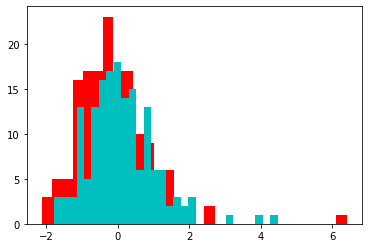

In [20]:
from matplotlib import pyplot as plt

features=char_csv[char_csv['region_index']==4].drop_duplicates("subject_id")
phen_csv['subject_id']=phen_csv['SUB_ID']
#remover columna de handedness antes de merge
phen_csv = phen_csv.drop(columns='HANDEDNESS_CATEGORY')
print('before dropna:', len(phen_csv))
phen_csv=phen_csv.query('DSM_IV_TR>=0 & DSM_IV_TR<=4 & GENERO==1').dropna()
print('after dropna:', len(phen_csv))
phen_csv=phen_csv[phen_csv!=-9999]
print('after 999', len(phen_csv))

for sub in discard_q_csv['ID'].values:
    phen_csv = phen_csv.query('subject_id!=@sub')
print('after QA: ', len(phen_csv))

features_merge=features.merge(phen_csv, on='subject_id')

print(len(np.unique(features_merge['subject_id'])))

print('ninos: ', len(phen_csv.query('EDAD>=19')))
print('ninos ASD: ', len(phen_csv.query('EDAD>=19').query('DX_GROUP==1')))
print('ninos control: ', len(phen_csv.query('EDAD>=19').query('DX_GROUP==2')))

print(np.shape(features_merge))

num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}

print(num_class)

#features_balanced=balance_classes(features_merge, num_class)
features_balanced = features_merge
num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}
print(num_class_balanced)

#features_balanced.iloc[:,:-4].to_csv('children_region_50.csv')

display(features_balanced)

#pd.concat([features_balanced.iloc[:, 0:7], features_balanced.iloc[:, -5:]], axis=1).to_csv('adults_group.csv')

feature_matrix_p=features_balanced.iloc[:,7:250].values.astype(float)

feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)



asd_index=np.where(features_balanced['DX_GROUP']==1)

control_index=np.where(features_balanced['DX_GROUP']==2)

subband=33

#0 alpha, 1 beta, 2 mu
feature=(subband-1)*3 + (1)

asd_row=feature_matrix_p[asd_index,feature].squeeze()

control_row=feature_matrix_p[control_index, feature].squeeze()

#w_value, p_value=scipy.stats.wilcoxon(asd_row, control_row)

print('datos de ASD: mean: '+str(np.mean(asd_row))+ '  '+'std: '+str(np.std(asd_row)))
print('datos de Control: mean: '+str(np.mean(control_row))+ '  '+'std: '+str(np.std(control_row)))

plt.hist(asd_row, bins=30, color='r')
plt.hist(control_row, bins=30, color='c')

#print(p_value)


In [21]:
#descartar el centro IP en todas sus presentaciones...
#discard_centers = ['IP_1']
#for center in discard_centers:
#    char_csv = char_csv[char_csv['site_id']!=center]

char_csv['site_id'].unique()

array(['BNI_1', 'ETH_1', 'IP_1', 'IU_1', 'KUL_3', 'NYU_1', 'ONRC_2',
       'TCD_1', 'USM_1', 'Caltech', 'CMU', 'Leuven', 'MaxMun', 'NYU',
       'Olin', 'Pitt', 'SBL', 'Trinity', 'UM', 'USM'], dtype=object)

phen_csv = phen_csv.dropna()

#char_DSM = char_csv.merge(phen_csv.dropna(), on='subject_id')

sub_ids = pd.unique(char_csv['subject_id'])

phen_csv_merged = phen_csv[phen_csv['subject_id'].isin(sub_ids)]

num_class={'ASD':(phen_csv_merged['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(phen_csv_merged['DX_GROUP']==1).value_counts()[0]}

phen_csv_balanced = balance_classes(phen_csv_merged, num_class)

char_DSM = char_csv.merge(phen_csv_balanced.dropna(), on='subject_id') 

char_DSM.iloc[:,0:250].to_csv('adults_curvelet_sample.csv', index=False)

print(np.unique(char_DSM['subject_id']).shape)

display(char_DSM.iloc[7600:7610, :250])
#display(phen_csv_balanced[['subject_id','DX_GROUP', 'DSM_IV_TR']].values)


In [22]:
def get_quartiles(features):
    return np.array([np.percentile(features, 25), np.percentile(features, 75)] )

In [23]:
def compare_quartiles(quartiles):
    return [np.where(quartiles[:,0]==np.min(quartiles[:,0]))[0].squeeze()+1, np.where(quartiles[:,1]==np.max(quartiles[:,1]))[0].squeeze()+1]
    

# Probando false discovery rate

In [24]:
def run_statistical_test(data_A, data_B):
    _, p_shap_c1 = normaltest(data_A)
    _, p_shap_c2 = normaltest(data_B)
    
    if (p_shap_c1>0.05 and p_shap_c2>0.05):
        t_value, p_value=scipy.stats.ttest_ind(data_A, data_B, equal_var=False)
        test='t-test'         
    else:
        w_value, p_value=scipy.stats.mannwhitneyu(data_A, data_B)
        test='wilcoxon'
    
    return p_value, test
    

idx = region_idx[-4]
region_name = region_list[-4]

features=char_csv[char_csv['region_index']==idx]
phen_csv['subject_id']=phen_csv['SUB_ID']
phen_csv=phen_csv.dropna()
phen_csv=phen_csv[phen_csv!=-9999]
features_merge=features.merge(phen_csv.dropna(), on='subject_id')
    
    
    #TODO hacer funcion que balancee las clases
num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}
    
print(num_class)
    #np.random.seed(94)
    #ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
    #ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
    #asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
    
    #features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
features_balanced=balance_classes(features_merge, num_class)
num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}

feature_matrix_p=features_balanced.iloc[:,7:250].values
    
feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)
    
dx_group=features_balanced['DX_GROUP'].values
    
subject_idx = features_balanced['subject_id'].values
    
sub_bands_region=[]

asd_idx = np.where(dx_group==1)[0].tolist()
ctrl_index = np.where(dx_group==2)[0].tolist()
class_k = len(features_balanced)

print(ctrl_index)
num_samples = 100

p_vals = []

for k in tqdm.tqdm(range(len(feature_matrix_p.T))):
    feature_vector = feature_matrix_p[:,k]
    asd_features = feature_vector[asd_idx]
    ctrl_features = feature_vector[ctrl_index]
    
    for j in range(num_samples):
        asd_sample = np.random.choice(asd_features, size=class_k * 70 // 100, replace=True)
        ctrl_sample = np.random.choice(ctrl_features, size=class_k * 70 // 100, replace=True)
        p_value, _ = run_statistical_test(asd_sample, ctrl_sample)
        p_vals.append(p_value)

print(len(p_vals))

p_vals_sort = np.sort(p_vals)
rank = [i+1 for i in range(len(p_vals))]
num_tests = len(p_vals)

q_vals = [p_vals_sort[-1]]

for j, r in enumerate(rank[::-1]):
    
    if r == num_tests:
        continue
        
    i = r-1
    p_val = p_vals_sort[i]
    
    pr = p_val * (num_tests/r)
    
    if pr < q_vals[j-1]:
        q_vals.append(pr)
    else:
        q_vals.append(q_vals[j-1])
    

In [25]:
def generate_q_values(p_vals):
    p_vals_sort = np.sort(p_vals)
    rank = [i+1 for i in range(len(p_vals))]
    num_tests = len(p_vals)

    q_vals = [p_vals_sort[-1]]

    for j, r in enumerate(rank[::-1]):

        if r == num_tests:
            continue

        i = r-1
        p_val = p_vals_sort[i]

        pr = p_val * (num_tests/r)

        if pr < q_vals[j-1]:
            q_vals.append(pr)
        else:
            q_vals.append(q_vals[j-1])
    
    return q_vals

In [26]:
def false_discovery_rate(feature_matrix_p, dx_group, k_partition, num_samples):
    p_vals=[]
    asd_idx = np.where(dx_group==1)[0].tolist()
    ctrl_index = np.where(dx_group==2)[0].tolist()
    class_k = len(features_balanced)
    
    for k in tqdm.tqdm(range(len(feature_matrix_p.T))):
        feature_vector = feature_matrix_p[:,k]
        asd_features = feature_vector[asd_idx]
        ctrl_features = feature_vector[ctrl_index]

        for j in range(num_samples):
            asd_sample = np.random.choice(asd_features, size=class_k * k_partition // 100, replace=True)
            ctrl_sample = np.random.choice(ctrl_features, size=class_k * k_partition // 100, replace=True)
            p_value, _ = run_statistical_test(asd_sample, ctrl_sample)
            p_vals.append(p_value)
    
    q_vals = generate_q_values(p_vals)
    
    return q_vals, np.sort(p_vals)[::-1]
    

In [27]:
def map_p_q(p_vals_asc, q_vals, p_val):
    #p_vals asc, p_values en orden ascendente
    #q vals, q values en orden ascendente
    dif = np.abs(p_vals_asc - p_val)
    dif_idx = np.where(dif == dif.min())[0][0]
    return q_vals[dif_idx]

q_vals, p_vals_asc = false_discovery_rate(feature_matrix_p, dx_group, 70, 100)

In [28]:
#map_p_q(p_vals_asc, q_vals, )

plt.plot(p_vals_asc, q_vals)

In [29]:

#phen_csv=phen_csv.drop(columns='HANDEDNESS_CATEGORY')

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import normaltest
import sklearn
from matplotlib.colors import Normalize

regions_subbands=[]

for i, idx in enumerate(region_idx):
    region_name=region_list[i]
    print(region_name)
    features=char_csv[char_csv['region_index']==idx].dropna().drop_duplicates("subject_id")
    phen_csv['subject_id']=phen_csv['SUB_ID']
    phen_csv=phen_csv.dropna()
    phen_csv=phen_csv[phen_csv!=-9999]
    features_merge=features.merge(phen_csv.dropna(), on='subject_id')
    print(features_merge)
    
    #TODO hacer funcion que balancee las clases
    num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}
    
    print(num_class)
    #np.random.seed(94)
    #ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
    #ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
    #asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
    
    #features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    
    #no vamos a balancear clases...
    features_balanced = features_merge
    #features_balanced=balance_classes(features_merge, num_class)
    
    num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}
    
    print('balanced')
    print(num_class_balanced)

    feature_matrix_p=features_balanced.iloc[:,7:250].values
    
    feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)
    
    dx_group=features_balanced['DX_GROUP'].values
    
    subject_idx = features_balanced['subject_id'].values
    
    sub_bands_region=[]
    
    q_vals, p_vals_asc = false_discovery_rate(feature_matrix_p, dx_group, 70, 100)
    
    for k, feature_group in enumerate(np.arange(243).reshape(81,3)):
        
        significative_features={}
        feature_labels=['alpha', 'beta', 'mu']
        sig_features_list=[]
        sig_features_labels=[]
        for j, feat in enumerate(feature_group):
                #dsm=features_balanced['DSM_IV_TR'].values
                feature_matrix=feature_matrix_p[:, feat].reshape(-1,1)
                feature_vector=feature_matrix.reshape(-1)
                # 1 probamos con shappiro...
                _, p_shap_c1 = normaltest(feature_vector[np.where(dx_group==1)])
                _, p_shap_c2 = normaltest(feature_vector[np.where(dx_group==2)])
                
                if (p_shap_c1>0.05 and p_shap_c2>0.05):
                    
                    t_value, p_value=scipy.stats.ttest_ind(feature_vector[np.where(dx_group==1)], 
                                                   feature_vector[np.where(dx_group==2)], equal_var=False)
                    test='t-test'
                    
                else:
                    w_value, p_value=scipy.stats.mannwhitneyu(feature_vector[np.where(dx_group==1)], 
                                                   feature_vector[np.where(dx_group==2)])
                    
                    test='wilcoxon'
                    
                
                print('caracteristica numero: ' + str(feat+1))
                print('sub-banda: ' + str(k+1))
                print(test+': '+str(p_value))
            
                q_value = map_p_q(p_vals_asc, q_vals, p_value)
                
                if q_value<0.05:
                    #significative_features[feature_labels[j]]=p_value
                    #sig_features_list.append(feat)
                    #sig_features_labels.append(feature_labels[j])
                    
                    fig, axs = plt.subplots(2,2,figsize=(10,10), dpi=200)
                    
                    sub_bands_region.append(k+1)
                    
                    #asd=(np.std(feature_vector[np.where(dx_group==1)])/np.shape(feature_vector[np.where(dx_group==1)])[0])**-1*feature_vector[np.where(dx_group==1)]
                    #control=(np.std(feature_vector[np.where(dx_group==2)])/np.shape(feature_vector[np.where(dx_group==2)])[0])**-1*feature_vector[np.where(dx_group==2)]
                    
                    asd=feature_vector[np.where(dx_group==1)]
                    
                    control=feature_vector[np.where(dx_group==2)]
                    
                    print('quartiles')
                    quartiles = np.array([get_quartiles(asd), get_quartiles(control)])
                    comparison = compare_quartiles(quartiles)
                    quartile_idx = np.array(comparison)-1
                    comp_values = [row[comp] for row,comp in zip(quartiles.T, quartile_idx)]
                    
                    print(comparison)
                    print(comp_values)
                    
                    val_idx=0
                    comp_dict = {}
                    for comp,val in zip(comparison, comp_values):
                        features = feature_vector[np.where(dx_group==comp)]
                        subs_idx_df = subject_idx[np.where(dx_group==comp)]
                        sub_idx = (np.where(np.abs(features)>=abs(val))[0]).squeeze()
                        subs = subs_idx_df[sub_idx]
                        comp_dict[comp]=subs
                    
                    feature_concat=[*asd.reshape(-1).tolist(), *control.reshape(-1).tolist()]
                    #print(concat)
                    
                    asd_dx=1*np.ones(np.shape(feature_vector[np.where(dx_group==1)]))
                    ctrl_dx=2*np.ones(np.shape(feature_vector[np.where(dx_group==2)]))
                    
                    concat_dx=[*asd_dx.tolist(), *ctrl_dx.tolist()]
                    #print(concat_dx)
                    
                    scatter_dataframe_dx_group=pd.DataFrame(data={feature_labels[j]:feature_concat,
                                                'dx_group':concat_dx})
                    
                    
                    sns.boxplot(x='dx_group', y=feature_labels[j], data=scatter_dataframe_dx_group, palette=colors[i], ax=axs[0][0])
                    sns.distplot(scatter_dataframe_dx_group[feature_labels[j]], ax=axs[0][1], color='0.23', kde=False)
                    sns.distplot(scatter_dataframe_dx_group[scatter_dataframe_dx_group['dx_group']==1][feature_labels[j]], color=colors[i][0], ax=axs[1][0], kde=False)
                    sns.distplot(scatter_dataframe_dx_group[scatter_dataframe_dx_group['dx_group']==2][feature_labels[j]], color=colors[i][1], ax=axs[1][1], kde=False)
                    axs[1][0].set_title('Distribution '+feature_labels[j]+' '+'ASD')
                    axs[0][1].set_title('Comparison '+feature_labels[j]+' '+'ASD vs Controls')
                    axs[1][1].set_title('Distribution '+feature_labels[j]+' '+'Controls')
                    axs[0][0].set_title('Differences distribution ASD vs Controls')
                
                    #axs[0][1].hist(feature_concat)
                    #axs[1][0].hist(asd)
                    #axs[1][1].hist(control)
                    
                    fig.suptitle('Region: '+region_name+' Sub-band: '+str(k+1)+'\n Feature: '+feature_labels[j]+', Test: '+test+' P-value: '+str(np.round(p_value, decimals=4))+' Q-value: '+str(np.round(q_value, decimals=4)), fontsize=16)
                    
                    if not os.path.exists(os.getcwd()+'/results/'+region_name+'/1-sig'):
                        os.makedirs(os.getcwd()+'/results/'+region_name+'/1-sig')
                    fig.savefig(os.getcwd()+'/results/'+region_name+'/1-sig/'+'feature'+str(feat+1)+'-subband'+str(k+1)+'.pdf')
                    plt.close(fig)
                    pd.DataFrame.from_dict(comp_dict, orient='index').transpose().to_csv(os.getcwd()+'/results/'+region_name+'/1-sig/'+'subjects-feature'+str(feat+1)+'-subband'+str(k+1)+'.csv',index=False)
        feature_matrix_list=np.array(sig_features_list)
    regions_subbands.append(np.unique(sub_bands_region))

    fig,axs=plt.subplots(1,1, figsize=(5,5), dpi=200, subplot_kw=dict(projection='polar'))

    curv_bands=np.zeros(81)
    
    if not os.path.exists(os.getcwd()+'/results/'+region_name):
        os.makedirs(os.getcwd()+'/results/'+region_name)
        
    if not np.unique(sub_bands_region).size == 0:
        curv_bands[[subband-1 for subband in np.unique(sub_bands_region)]]=1
    
    fig.suptitle('Discriminant Subbands \n Region: '+region_name, fontsize=14)
    
    bulls_eye(axs, curv_bands, cmap='RdBu', norm=Normalize(vmin=-1.6, vmax=1.6), raidal_subdivisions=(1,16,32,32),
    centered=(True, True, True, True), add_nomenclatures=False, cell_resolution=16,
              pfi_where_to_save=os.getcwd()+'/results/'+region_name+'/sub-bands-plot.pdf', colors_bound='0.20')
    
    plt.tight_layout()
    plt.close(fig)
    

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

left amygdala
     region_index    region_name  subject_id  dx_group   dataset site_id  \
0             1.0  left amygdala     29588.0       1.0  ABIDE-II    IP_1   
1             1.0  left amygdala     29595.0       1.0  ABIDE-II    IP_1   
2             1.0  left amygdala     29627.0       1.0  ABIDE-II    IP_1   
3             1.0  left amygdala     29580.0       2.0  ABIDE-II    IP_1   
4             1.0  left amygdala     29583.0       2.0  ABIDE-II    IP_1   
..            ...            ...         ...       ...       ...     ...   
314           1.0  left amygdala     50508.0       1.0   ABIDE-I     USM   
315           1.0  left amygdala     50514.0       1.0   ABIDE-I     USM   
316           1.0  left amygdala     50525.0       1.0   ABIDE-I     USM   
317           1.0  left amygdala     50529.0       1.0   ABIDE-I     USM   
318           1.0  left amygdala     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GR

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:11<00:00,  3.41it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.02324052087296279
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.09371426266594823
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.0763658758265338
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3294500903194525
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.36349277578184586
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.4497462213190477
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.09910811817951587
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.48764791215755443
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.2299660647442831
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.07044936886441394
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.0912991876034589
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.2299660647442831
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.42415819929427
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3086350539968053
caracteristica numero: 15
sub-banda: 5
t-test: 0.4974

caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.18980530721498795
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.4279672118122442
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.4024041438718513
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.49975776345908834
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.02944661665736695
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.04887853927876068
caracteristica numero: 177
sub-banda: 59
t-test: 0.04643117595197779
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.0386697689348407
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.0615765505513777
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.2938310269140671
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.049001662709734176
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.09679902170255383
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.48764791215755443
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.037962443606729034
caracterist

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

right amygdala
     region_index     region_name  subject_id  dx_group   dataset site_id  \
0             2.0  right amygdala     29588.0       1.0  ABIDE-II    IP_1   
1             2.0  right amygdala     29595.0       1.0  ABIDE-II    IP_1   
2             2.0  right amygdala     29627.0       1.0  ABIDE-II    IP_1   
3             2.0  right amygdala     29580.0       2.0  ABIDE-II    IP_1   
4             2.0  right amygdala     29583.0       2.0  ABIDE-II    IP_1   
..            ...             ...         ...       ...       ...     ...   
315           2.0  right amygdala     50508.0       1.0   ABIDE-I     USM   
316           2.0  right amygdala     50514.0       1.0   ABIDE-I     USM   
317           2.0  right amygdala     50525.0       1.0   ABIDE-I     USM   
318           2.0  right amygdala     50529.0       1.0   ABIDE-I     USM   
319           2.0  right amygdala     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   D

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:04<00:00,  3.74it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3791784450864727
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.39491165896640856
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.15110412424795994
caracteristica numero: 4
sub-banda: 2
t-test: 0.5695547959572049
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.0527036802198542
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.08464636718993407
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.0695748524924571
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.03754160765207734
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.20674936830190177
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.45788247473671817
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.47181240760036197
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.20674936830190177
caracteristica numero: 13
sub-banda: 5
t-test: 0.3574172130990184
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.497347695149255
caracteristica numero: 15
sub-banda: 5
t-test: 0.96916

caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.01444797448009104
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.4428100777594071
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.005576433869338967
quartiles
[1, 2]
[-0.7863501310645182, 0.7444056215740866]
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.1866577690088052
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.3249479998397158
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.07854912153728788
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.45740295465755265
caracteristica numero: 129
sub-banda: 43
t-test: 0.03233576449790757
caracteristica numero: 130
sub-banda: 44
t-test: 0.08094541826354287
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.12134214720220765
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.20092902348335717
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.05769057772391492
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.2233468692854806
caracteristica numero: 13

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

left cingulate gyrus, anterior division
     region_index                              region_name  subject_id  \
0             3.0  left cingulate gyrus, anterior division     29588.0   
1             3.0  left cingulate gyrus, anterior division     29595.0   
2             3.0  left cingulate gyrus, anterior division     29627.0   
3             3.0  left cingulate gyrus, anterior division     29580.0   
4             3.0  left cingulate gyrus, anterior division     29583.0   
..            ...                                      ...         ...   
315           3.0  left cingulate gyrus, anterior division     50508.0   
316           3.0  left cingulate gyrus, anterior division     50514.0   
317           3.0  left cingulate gyrus, anterior division     50525.0   
318           3.0  left cingulate gyrus, anterior division     50529.0   
319           3.0  left cingulate gyrus, anterior division     50531.0   

     dx_group   dataset site_id      age    curv_1    curv_2    curv_3 

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:05<00:00,  3.70it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.1648059436866275
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.17645449731681873
caracteristica numero: 3
sub-banda: 1
t-test: 0.1566544976938152
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.09972159966452493
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.09678974011783165
caracteristica numero: 6
sub-banda: 2
t-test: 0.7911327575567684
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.16034817862658757
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.14717361615782482
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.004302975430954907
quartiles
[2, 1]
[-0.9572633850261352, 0.837342342071459]
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.24030124114754298
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.25211112155832166
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.004302975430954907
quartiles
[2, 1]
[-0.9572633850261341, 0.837342342071459]
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.08837458991800884
c

sub-banda: 50
wilcoxon: 0.3650051053943266
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.0489166825589024
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.23173766886882974
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.3120075965588105
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.02749422405658896
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.16005382230994852
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.15280981557766382
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.2963618205159768
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.09351713027739184
caracteristica numero: 158
sub-banda: 53
t-test: 0.14550063623110532
caracteristica numero: 159
sub-banda: 53
t-test: 0.3014542622103857
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.11348632059668795
caracteristica numero: 161
sub-banda: 54
t-test: 0.18352422955017786
caracteristica numero: 162
sub-banda: 54
t-test: 0.3014542622103861
caracteristica numero: 163
sub-banda: 55
wilcox

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

right cingulate gyrus, anterior division
     region_index                               region_name  subject_id  \
0             4.0  right cingulate gyrus, anterior division     29588.0   
1             4.0  right cingulate gyrus, anterior division     29595.0   
2             4.0  right cingulate gyrus, anterior division     29627.0   
3             4.0  right cingulate gyrus, anterior division     29580.0   
4             4.0  right cingulate gyrus, anterior division     29583.0   
..            ...                                       ...         ...   
315           4.0  right cingulate gyrus, anterior division     50508.0   
316           4.0  right cingulate gyrus, anterior division     50514.0   
317           4.0  right cingulate gyrus, anterior division     50525.0   
318           4.0  right cingulate gyrus, anterior division     50529.0   
319           4.0  right cingulate gyrus, anterior division     50531.0   

     dx_group   dataset site_id      age    curv_1    curv

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:07<00:00,  3.60it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.37001441574749877
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.44782649350244075
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.26898593881992244
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.011292040577377562
quartiles
[1, 2]
[-0.4938044506807164, 0.053032934887248806]
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.012142321343909745
quartiles
[1, 2]
[-0.6470804829344163, 0.32831609719155125]
caracteristica numero: 6
sub-banda: 2
t-test: 0.6974309395528611
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.41034806994209877
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.4047173829088909
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.2778336342912788
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.26898593881992244
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.24826834177546048
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.2778336342912788
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.1025016570760

caracteristica numero: 114
sub-banda: 38
t-test: 0.6186310255287943
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.12804816347064585
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.10644337873430215
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.24712162788647152
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.09072126423099464
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.0814238525508883
caracteristica numero: 120
sub-banda: 40
t-test: 0.3378371635401647
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.047583842624174304
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.04443547290428429
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.4397101215312431
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.043424109528256205
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.0489166825589024
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.3403178325685985
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.09371924351328104
caracteristica

quartiles
[1, 2]
[-0.47455350418526765, 0.5984612281404503]
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.30202859088753964
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.02422708603128274
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.012066242209877285
quartiles
[1, 2]
[-0.42296618862067814, 0.5573514419742858]
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.3611497961382578
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.018609025063914132
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.01696776816943442
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.4122291417193104
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.022235320948025196
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.03925427828009435
caracteristica numero: 240
sub-banda: 80
t-test: 0.959626771003229
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.019336487630270897
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.0545488087058014
caracteristica numero: 243
sub-

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

right supramarginal gyrus, anterior division
     region_index                                   region_name  subject_id  \
0             5.0  right supramarginal gyrus, anterior division     29588.0   
1             5.0  right supramarginal gyrus, anterior division     29595.0   
2             5.0  right supramarginal gyrus, anterior division     29627.0   
3             5.0  right supramarginal gyrus, anterior division     29580.0   
4             5.0  right supramarginal gyrus, anterior division     29583.0   
..            ...                                           ...         ...   
315           5.0  right supramarginal gyrus, anterior division     50508.0   
316           5.0  right supramarginal gyrus, anterior division     50514.0   
317           5.0  right supramarginal gyrus, anterior division     50525.0   
318           5.0  right supramarginal gyrus, anterior division     50529.0   
319           5.0  right supramarginal gyrus, anterior division     50531.0   

     d

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:07<00:00,  3.62it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.02123076735488847
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.02644054638550527
caracteristica numero: 3
sub-banda: 1
t-test: 0.013194121898646405
quartiles
[1, 2]
[-0.854661084368767, 0.8265789844504285]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.033121987377148235
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.06781528316253377
caracteristica numero: 6
sub-banda: 2
t-test: 0.6978975099795373
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.022107598384622975
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.020443083667776467
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4169405606485277
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.0487942957585385
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.044662778133056025
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4169405606485277
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.06155838047527107
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.071864

quartiles
[1, 2]
[-0.7619608842444275, 0.9003392642865757]
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.0387440754811562
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.058674501375571626
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.014581476561126072
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.006937001060221738
quartiles
[1, 2]
[-0.7515346511190005, 0.7528945524057854]
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.011766043937724244
quartiles
[1, 2]
[-0.8266663484125089, 0.8956116530260811]
caracteristica numero: 135
sub-banda: 45
t-test: 0.1483295168148147
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.020562629410740902
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.04604634405813392
caracteristica numero: 138
sub-banda: 46
t-test: 0.1483295168148147
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.026588973562621573
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.07592455680372312
caracteristica numero: 141
sub-banda: 47
t-

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

left superior temporal gyrus, anterior division
     region_index                                      region_name  \
0             6.0  left superior temporal gyrus, anterior division   
1             6.0  left superior temporal gyrus, anterior division   
2             6.0  left superior temporal gyrus, anterior division   
3             6.0  left superior temporal gyrus, anterior division   
4             6.0  left superior temporal gyrus, anterior division   
..            ...                                              ...   
315           6.0  left superior temporal gyrus, anterior division   
316           6.0  left superior temporal gyrus, anterior division   
317           6.0  left superior temporal gyrus, anterior division   
318           6.0  left superior temporal gyrus, anterior division   
319           6.0  left superior temporal gyrus, anterior division   

     subject_id  dx_group   dataset site_id      age    curv_1    curv_2  \
0       29588.0       1.0  ABIDE-II

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:04<00:00,  3.78it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.030951550858682116
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.04145714901855522
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.04535031720250749
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.08973792388787788
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.02866178030248611
caracteristica numero: 6
sub-banda: 2
t-test: 0.8200492451523684
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.009465621238573491
quartiles
[1, 2]
[-0.86154314885208, 0.6886127766765676]
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.015640707549438283
quartiles
[1, 2]
[-0.8563255939262427, 0.7101264555120019]
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.04177986881478875
caracteristica numero: 10
sub-banda: 4
t-test: 0.027113794495252412
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.02301479906923739
quartiles
[1, 2]
[-0.7100378594720445, 0.7722182051570213]
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.04177986881478875
caracte

caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.005772016774283133
quartiles
[1, 2]
[-0.7629773476967577, 0.6848180717064178]
caracteristica numero: 105
sub-banda: 35
t-test: 0.6381799860998387
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.05967154952144615
caracteristica numero: 107
sub-banda: 36
t-test: 0.09438425296772997
caracteristica numero: 108
sub-banda: 36
t-test: 0.6501249037168129
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.011581729553476828
quartiles
[1, 2]
[-0.7602848831674892, 0.7409152915824204]
caracteristica numero: 110
sub-banda: 37
t-test: 0.05004681137491469
caracteristica numero: 111
sub-banda: 37
t-test: 0.5418294790205767
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.007174190599432556
quartiles
[1, 2]
[-0.8036626218591628, 0.7097722062903687]
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.016916953385011316
quartiles
[1, 2]
[-0.7203828527254694, 0.7238816120496567]
caracteristica numero: 114
sub-banda: 38
t-test: 0.541829479020

caracteristica numero: 194
sub-banda: 65
t-test: 0.01901215790803001
quartiles
[1, 2]
[-0.7251367940711008, 0.7130179844940459]
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.06593516597305941
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.013128956489620418
quartiles
[1, 2]
[-0.7758788331799692, 0.5935578579428136]
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.01979605978497136
quartiles
[1, 2]
[-0.7873950387396168, 0.6988237502322243]
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.2240695705575237
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.005851938953799385
quartiles
[1, 2]
[-0.7419091768891866, 0.576278311314168]
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.009651443225981613
quartiles
[1, 2]
[-0.7842345964774463, 0.6574590244478138]
caracteristica numero: 201
sub-banda: 67
t-test: 0.12668197037809095
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.013584569349820821
quartiles
[1, 2]
[-0.8824213833678384, 1.119851314275044]
caracteris

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Right temporal fusiform cortex, anterior division
     region_index                                        region_name  \
0             7.0  Right temporal fusiform cortex, anterior division   
1             7.0  Right temporal fusiform cortex, anterior division   
2             7.0  Right temporal fusiform cortex, anterior division   
3             7.0  Right temporal fusiform cortex, anterior division   
4             7.0  Right temporal fusiform cortex, anterior division   
..            ...                                                ...   
315           7.0  Right temporal fusiform cortex, anterior division   
316           7.0  Right temporal fusiform cortex, anterior division   
317           7.0  Right temporal fusiform cortex, anterior division   
318           7.0  Right temporal fusiform cortex, anterior division   
319           7.0  Right temporal fusiform cortex, anterior division   

     subject_id  dx_group   dataset site_id      age    curv_1    curv_2  \
0       2

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:07<00:00,  3.63it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.226245626156167
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.30859452399813114
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.1866577690088052
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.07872650780501417
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.06941345325413233
caracteristica numero: 6
sub-banda: 2
t-test: 0.050198936664687714
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.03011698025879287
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.028111887837311424
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.0029631674220700313
quartiles
[1, 2]
[-0.7887879950000374, 0.8964107426194025]
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.4502179813943614
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4569234965838141
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.0029631674220700313
quartiles
[1, 2]
[-0.7887879950000373, 0.8964107426194033]
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.0474641319315

caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.3842481323507486
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.14773088201840162
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.2909513214179836
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.33854730374297803
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.3487754194435828
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.05065598054017883
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.04443547290428429
caracteristica numero: 153
sub-banda: 51
t-test: 0.6425081854217445
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.17395986556999765
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.23432582438713956
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.10315113535355763
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.2843563294788286
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.3860966271978477
caracteristica numero: 159
sub-banda: 53
t-test: 0.7077483802125354
caracteristica nu

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Left frontal pole
     region_index        region_name  subject_id  dx_group   dataset site_id  \
0             8.0  Left frontal pole     29588.0       1.0  ABIDE-II    IP_1   
1             8.0  Left frontal pole     29595.0       1.0  ABIDE-II    IP_1   
2             8.0  Left frontal pole     29627.0       1.0  ABIDE-II    IP_1   
3             8.0  Left frontal pole     29580.0       2.0  ABIDE-II    IP_1   
4             8.0  Left frontal pole     29583.0       2.0  ABIDE-II    IP_1   
..            ...                ...         ...       ...       ...     ...   
314           8.0  Left frontal pole     50508.0       1.0   ABIDE-I     USM   
315           8.0  Left frontal pole     50514.0       1.0   ABIDE-I     USM   
316           8.0  Left frontal pole     50525.0       1.0   ABIDE-I     USM   
317           8.0  Left frontal pole     50529.0       1.0   ABIDE-I     USM   
318           8.0  Left frontal pole     50531.0       1.0   ABIDE-I     USM   

         age    curv_

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:09<00:00,  3.48it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.46298525006835184
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4389448330065416
caracteristica numero: 3
sub-banda: 1
t-test: 0.35114772981790854
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3753888997112169
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.39068557374850754
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.1800460289541177
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.10446954147843124
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.10646358135614542
caracteristica numero: 9
sub-banda: 3
t-test: 0.3883767501892259
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.2161596261584332
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2277242654683394
caracteristica numero: 12
sub-banda: 4
t-test: 0.3883767501892259
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.26204621744801093
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.21937733925004044
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.25732

caracteristica numero: 141
sub-banda: 47
t-test: 0.44638103899305714
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.11145324135252516
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.12515338890500816
caracteristica numero: 144
sub-banda: 48
t-test: 0.5185117834256587
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.10424966305128741
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.10446954147843124
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.3445025050047119
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.014917086006415451
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.027297812783995117
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.4509425452991969
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.040619967242188214
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.056825153814150535
caracteristica numero: 153
sub-banda: 51
t-test: 0.26000037417869726
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.06831300157869084
caracterist

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Right frontal pole
     region_index         region_name  subject_id  dx_group   dataset site_id  \
0             9.0  Right frontal pole     29588.0       1.0  ABIDE-II    IP_1   
1             9.0  Right frontal pole     29595.0       1.0  ABIDE-II    IP_1   
2             9.0  Right frontal pole     29627.0       1.0  ABIDE-II    IP_1   
3             9.0  Right frontal pole     29580.0       2.0  ABIDE-II    IP_1   
4             9.0  Right frontal pole     29583.0       2.0  ABIDE-II    IP_1   
..            ...                 ...         ...       ...       ...     ...   
314           9.0  Right frontal pole     50508.0       1.0   ABIDE-I     USM   
315           9.0  Right frontal pole     50514.0       1.0   ABIDE-I     USM   
316           9.0  Right frontal pole     50525.0       1.0   ABIDE-I     USM   
317           9.0  Right frontal pole     50529.0       1.0   ABIDE-I     USM   
318           9.0  Right frontal pole     50531.0       1.0   ABIDE-I     USM   

        

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:08<00:00,  3.56it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.40332932315283077
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3680406231344426
caracteristica numero: 3
sub-banda: 1
t-test: 0.5351539172521993
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4823197438645048
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.45671810140405217
caracteristica numero: 6
sub-banda: 2
t-test: 0.012955198938257013
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4649155266057583
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3648406928972213
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.40097981979583924
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.015240506961791737
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.00794225766085637
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.40097981979583924
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2652204630143533
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.2592848146336089
caracteristica numero: 15
sub-banda: 5
t-test: 0.183

caracteristica numero: 152
sub-banda: 51
t-test: 0.10967598705015298
caracteristica numero: 153
sub-banda: 51
t-test: 0.05931570001597521
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.07916060071024295
caracteristica numero: 155
sub-banda: 52
t-test: 0.10820491455319114
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.053309715514320656
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.3246042513885197
caracteristica numero: 158
sub-banda: 53
t-test: 0.35210118461182716
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.18681795366825754
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.31289682560926646
caracteristica numero: 161
sub-banda: 54
t-test: 0.4946449551662294
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.18681795366825754
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.022048143025332322
caracteristica numero: 164
sub-banda: 55
t-test: 0.010677543581806014
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.2846668713721461
caracteristica num

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Left angular gyrus
     region_index         region_name  subject_id  dx_group   dataset site_id  \
0            10.0  Left angular gyrus     29588.0       1.0  ABIDE-II    IP_1   
1            10.0  Left angular gyrus     29595.0       1.0  ABIDE-II    IP_1   
2            10.0  Left angular gyrus     29627.0       1.0  ABIDE-II    IP_1   
3            10.0  Left angular gyrus     29580.0       2.0  ABIDE-II    IP_1   
4            10.0  Left angular gyrus     29583.0       2.0  ABIDE-II    IP_1   
..            ...                 ...         ...       ...       ...     ...   
311          10.0  Left angular gyrus     50508.0       1.0   ABIDE-I     USM   
312          10.0  Left angular gyrus     50514.0       1.0   ABIDE-I     USM   
313          10.0  Left angular gyrus     50525.0       1.0   ABIDE-I     USM   
314          10.0  Left angular gyrus     50529.0       1.0   ABIDE-I     USM   
315          10.0  Left angular gyrus     50531.0       1.0   ABIDE-I     USM   

        

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:02<00:00,  3.86it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2867045184984865
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.2509648346672172
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.18752276319346317
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.11796654513890759
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.1246711065385614
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.3313680094708886
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.280445555024015
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.26894222041930405
caracteristica numero: 9
sub-banda: 3
t-test: 0.6043685765701121
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.20983900140955536
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.20665909992107206
caracteristica numero: 12
sub-banda: 4
t-test: 0.6043685765701134
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.11435396700694972
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.10488337133595727
caracteristica numero: 15
sub-banda: 5
t-test: 0.903268

caracteristica numero: 153
sub-banda: 51
t-test: 0.06976498274414271
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.23781593736535317
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.24202818473661286
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.26894222041930405
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.32469158442784196
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.35080001157182605
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.09810932158437108
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.46074284529766757
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.48132947591776376
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.09810932158437108
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.4970509724129616
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.43056011422725227
caracteristica numero: 165
sub-banda: 55
t-test: 0.3617397369533659
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.02913700661302753
caracteristi

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Left frontal medial cortex
     region_index                 region_name  subject_id  dx_group   dataset  \
0            11.0  Left frontal medial cortex     29588.0       1.0  ABIDE-II   
1            11.0  Left frontal medial cortex     29595.0       1.0  ABIDE-II   
2            11.0  Left frontal medial cortex     29627.0       1.0  ABIDE-II   
3            11.0  Left frontal medial cortex     29580.0       2.0  ABIDE-II   
4            11.0  Left frontal medial cortex     29583.0       2.0  ABIDE-II   
..            ...                         ...         ...       ...       ...   
314          11.0  Left frontal medial cortex     50508.0       1.0   ABIDE-I   
315          11.0  Left frontal medial cortex     50514.0       1.0   ABIDE-I   
316          11.0  Left frontal medial cortex     50525.0       1.0   ABIDE-I   
317          11.0  Left frontal medial cortex     50529.0       1.0   ABIDE-I   
318          11.0  Left frontal medial cortex     50531.0       1.0   ABIDE-I   



100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:05<00:00,  3.70it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.008411942303275239
quartiles
[1, 2]
[-0.6630037498514907, 0.4098002917604108]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.011339183497499112
quartiles
[1, 2]
[-1.0792134344579771, 0.8652938440762017]
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.005839651165548684
quartiles
[1, 2]
[-0.867852975351222, 0.8786440451361619]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.01877885393215873
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.031026556842374424
caracteristica numero: 6
sub-banda: 2
t-test: 0.933819771849863
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.0018195217724477752
quartiles
[1, 2]
[-0.9600047564918461, 0.8844923916048719]
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.002326347858356787
quartiles
[1, 2]
[-0.9603178604749064, 0.8471200149061209]
caracteristica numero: 9
sub-banda: 3
t-test: 0.11390707676808609
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.0037533492501503666
quartiles
[1, 2]
[-0.9

caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.02039559060901641
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.4298742614185302
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.04336524649031531
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.053074088631794795
caracteristica numero: 105
sub-banda: 35
wilcoxon: 0.49975776350386203
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.23181378506443356
caracteristica numero: 107
sub-banda: 36
t-test: 0.9859228769502459
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.13337822503824942
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.4203562580094875
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.21124550744227982
caracteristica numero: 111
sub-banda: 37
t-test: 0.16548740616239024
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.3124939520631096
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.13760722441435447
caracteristica numero: 114
sub-banda: 38
t-test: 0.16548740616239047
caracteristica 

caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.2807942158240405
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.017481149222043423
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.017533650341565368
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.42701431469869566
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.25035235573584363
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.31897120775373994
caracteristica numero: 216
sub-banda: 72
t-test: 0.35005606133679523
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.3897702985865636
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.2938311304646784
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.24041893793177171
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.2748902966878017
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.48764791215755443
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.2656509144767387
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.31810431532146494
caracterist

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Right frontal medial cortex
     region_index                  region_name  subject_id  dx_group  \
0            12.0  Right frontal medial cortex     29588.0       1.0   
1            12.0  Right frontal medial cortex     29595.0       1.0   
2            12.0  Right frontal medial cortex     29627.0       1.0   
3            12.0  Right frontal medial cortex     29580.0       2.0   
4            12.0  Right frontal medial cortex     29583.0       2.0   
..            ...                          ...         ...       ...   
315          12.0  Right frontal medial cortex     50508.0       1.0   
316          12.0  Right frontal medial cortex     50514.0       1.0   
317          12.0  Right frontal medial cortex     50525.0       1.0   
318          12.0  Right frontal medial cortex     50529.0       1.0   
319          12.0  Right frontal medial cortex     50531.0       1.0   

      dataset site_id      age    curv_1    curv_2    curv_3  ...  SITE_ID  \
0    ABIDE-II    IP_1  19.710

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:20<00:00,  3.03it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.08197158908884628
caracteristica numero: 2
sub-banda: 1
t-test: 0.20997856512594468
caracteristica numero: 3
sub-banda: 1
t-test: 0.11500686907528732
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.10315113535355763
caracteristica numero: 5
sub-banda: 2
t-test: 0.3684999583454741
caracteristica numero: 6
sub-banda: 2
t-test: 0.20392631888379067
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.11559193218277464
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.11916268509940375
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.15975981954753538
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.02236366555708307
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.01656488039378165
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.15975981954753538
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.02718966036749519
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.014097101981462544
quartiles
[1, 2]
[-0.922525729663431, 0.73846018070

caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.09616980438692285
caracteristica numero: 140
sub-banda: 47
t-test: 0.3048676945008251
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.2944837217477979
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.07071274930088281
caracteristica numero: 143
sub-banda: 48
t-test: 0.1129725382207691
caracteristica numero: 144
sub-banda: 48
t-test: 0.2353471395815702
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.09866714737672544
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.10511749092297157
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.06501038086404458
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.031036050533419138
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.03420749786741642
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.16964851468976544
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.033751699176090444
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.020264869640162355
caracteristic

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Left juxtapositional lobule cortex
     region_index                         region_name  subject_id  dx_group  \
0            13.0  Left juxtapositional lobule cortex     29588.0       1.0   
1            13.0  Left juxtapositional lobule cortex     29595.0       1.0   
2            13.0  Left juxtapositional lobule cortex     29627.0       1.0   
3            13.0  Left juxtapositional lobule cortex     29580.0       2.0   
4            13.0  Left juxtapositional lobule cortex     29583.0       2.0   
..            ...                                 ...         ...       ...   
315          13.0  Left juxtapositional lobule cortex     50508.0       1.0   
316          13.0  Left juxtapositional lobule cortex     50514.0       1.0   
317          13.0  Left juxtapositional lobule cortex     50525.0       1.0   
318          13.0  Left juxtapositional lobule cortex     50529.0       1.0   
319          13.0  Left juxtapositional lobule cortex     50531.0       1.0   

      dataset si

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:06<00:00,  3.67it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.35866289052045414
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3860966271978477
caracteristica numero: 3
sub-banda: 1
t-test: 0.4194661906522872
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.11844237613791614
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.11371891757557512
caracteristica numero: 6
sub-banda: 2
t-test: 0.6033863952275187
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.053619957652853684
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.0703861863231594
caracteristica numero: 9
sub-banda: 3
t-test: 0.21676565333243833
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.14773088201840162
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.22226530847293552
caracteristica numero: 12
sub-banda: 4
t-test: 0.2167656533324386
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.48336751376679227
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.38286348427996353
caracteristica numero: 15
sub-banda: 5
t-test: 0.920562

caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.25832422583775094
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.23655691697179104
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.3496701686450382
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.2917806952654233
caracteristica numero: 153
sub-banda: 51
t-test: 0.15087694520267686
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.48384934742154273
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.4819221613485837
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.29012305085435736
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.332817857097956
caracteristica numero: 158
sub-banda: 53
t-test: 0.40985936156035496
caracteristica numero: 159
sub-banda: 53
t-test: 0.05994178584993349
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.20161005198859588
caracteristica numero: 161
sub-banda: 54
t-test: 0.292283336097509
caracteristica numero: 162
sub-banda: 54
t-test: 0.05994178584993384
caracteristica numero: 

In [31]:
print(np.unique(sub_bands_region))

[ 1  2  3  4  5  6  9 10 11 12 13 14 15 16 17 18 19 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 38 40 41 42 43 44 45 46 47 48 49 51 52 53 54 55 56
 60 61 62 63 64 65 67 68 69 70 71 72 73 76 77 78 79 80 81]


In [31]:
sub_bands_groups=[]

In [32]:
sub_bands_groups.append(sub_bands_region)

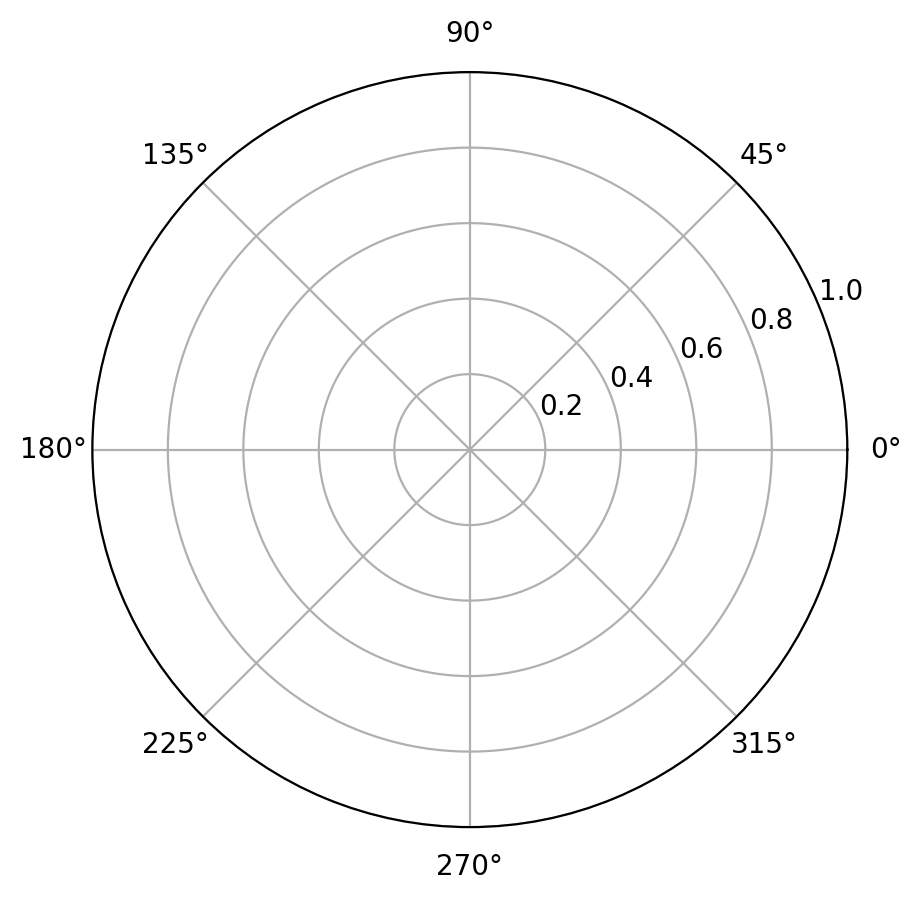

In [33]:
fig,axs=plt.subplots(1,1, figsize=(5,5), dpi=200, subplot_kw=dict(projection='polar'))
    

In [34]:
## comparando sujetos

In [35]:
sample_char = pd.read_csv('adults_curvelet_sample.csv')
char_comp = pd.read_csv(base_path+'/sample_characterization/adults_curvelet_sample.csv')

FileNotFoundError: [Errno 2] File adults_curvelet_sample.csv does not exist: 'adults_curvelet_sample.csv'

In [ ]:
subs_sample = sample_char['subject_id'].unique()
subs_sample_comp = char_comp['subject_id'].unique()


In [ ]:
print(subs_sample-subs_sample_comp)